# 범주형 데이터

## 파이썬에서 범주형 데이터 저장하기

파이썬의 **내장 클래스** 또는 **표준 모듈**에는 범주형 데이터를 위한 클래스가 없다. **넘파이** 배열에서도 범주형을 위한 dtype(데이터타입)을 지원하지 않는다. 하지만 데이터 분석에서 범주형 자료는 자주 쓰인다. 판다스에서는 범주형 데이터를 위해 `pd.Categorical()`과 `pd.Series([], dtype='category')`를 지원한다.

In [1]:
import numpy as np
import pandas as pd

다음은 동`East`, 서`West`, 남`South`, 북`North`을 범주로 갖는 자료를 `pd.Categorical()`과 `pd.Series()`를 사용하여 객체로 만든다. 

In [2]:
pd.Categorical(['North', 'East', 'West', 'East', 'West'])

['North', 'East', 'West', 'East', 'West']
Categories (3, object): ['East', 'North', 'West']

In [3]:
pd.Series(['North', 'East', 'West', 'East', 'West'],
          dtype='category')

0    North
1     East
2     West
3     East
4     West
dtype: category
Categories (3, object): ['East', 'North', 'West']

일단 `pd.Categorical()`과 `pd.Series([], dtype='category')`의 차이에 알아보자.

`type()`과 `.dtype`으로 둘을 비교해보면 다음과 같다.

In [4]:
x = pd.Categorical([])
type(x), x.dtype

(pandas.core.arrays.categorical.Categorical,
 CategoricalDtype(categories=[], ordered=False))

In [5]:
y = pd.Series([], dtype='category')
type(y), y.dtype

(pandas.core.series.Series, CategoricalDtype(categories=[], ordered=False))

이 둘의 관계는 마치 `np.array()`와 `pd.Series()`의 관계와 비슷하다. 먼저 `.dtype`은 `CategoricalDtype()`으로 동일하다(내용물은 같다고 볼 수 있다).

넘파이 배열은 범주형 자료를 지원하지 않기 때문에 판다스에서 새롭게 범주형을 지원하는 새로운 클래스를 만들었다.
위의 결과를 보면 클래스는 `pandas.core.arrays.categorical.Categorical`이다. 중간의 `arrays`에서 넘파이 배열(`array`)와의 유사성을 유추해 볼 수 있다. `pd.Categorical()`과 `pd.Series()`의 차이는 배열은 인덱스를 지원하지 않고, `pd.Series()`는 인덱스가 있다는 점이다.

`pd.Categorical()`에는 범주형 데이터를 다루는 여러 가지 메소드가 존재한다. 예를 들어 새로운 범주를 추가할 때에는 `.add_categories()` 메소드를 사용한다. 이런 메쏘드는 `pd.Series()`에서는 `.cat` accesor로 접근할 수 있다.  예를 들어, `x=pd.Categorical()`, `y=pd.Series([], dtype='category')`일 때, `x.add_categories([])`, `y.cat.add_cateogries([])`으로 쓴다.

## `pd.Categorical()`

`pd.Categorical` 객체를 생성하는 방법은 다음과 같다.[^rpdcategorical]

[^rpdcategorical]: 이는 R에서 `x <- factor(c('Alpha', 'Beta', 'Alpha', 'Charley', 'Beta'))`를 한 것과 비슷하다.

In [6]:
x = pd.Categorical(['Alpha', 'Beta', 'Alpha', 'Charley', 'Beta'])
x

['Alpha', 'Beta', 'Alpha', 'Charley', 'Beta']
Categories (3, object): ['Alpha', 'Beta', 'Charley']

위에서 생성한 `x`와 동일한 내용을 담고 있는 넘파이 배열 `y`를 다음과 같이 생성했다.

In [7]:
y = np.array(['Alpha', 'Beta', 'Alpha', 'Charley', 'Beta'])
type(y), y.dtype

(numpy.ndarray, dtype('<U7'))

문자열을 담고 있는 배열은 `dtype='O'` 또는 `dtype='U'`로 생성할 수 있다. `pd.array([], dtype='O')` 또는 `pd.array([], dtype='U')`과 같은 문자열 넘파이 배열과 `pd.Categorical()`의 차이는 데이터를 저장하는 방식에 있다. `pd.Categorical()`은 먼저 범주를 확인한다. `y`를 보면 총 자료는 5개이지만, `Alpha`와 `Beta`가 반복되고 있다. 그래서 총 범주는 3개로 리스트로 나타내면 `['Alpha', 'Beta', 'Charley']`이다. 그리고 이들에 코드를 배정한다. `Alpha`는 0, `Beta`는 1, `Charley`는 2로 코드를 배정한 후, 실제 데이터는 배정된 코드를 사용하여 표현한다. `['Alpha', 'Beta', 'Alpha', 'Charley', 'Beta']`는 코드로 나타내면 `[0,1,0,2,1]`이 된다. 

`pd.Categorical()`은 이렇게 데이터는 범주(category)와 코드로 분리해 저장하게 된다. 범주와 코드는 `.categories`와 `.codes`로 확인할 수 있다.

In [8]:
x.categories, x.codes

(Index(['Alpha', 'Beta', 'Charley'], dtype='object'),
 array([0, 1, 0, 2, 1], dtype=int8))

만약 결측값(`None` 또는 `np.nan`)이 있다면 코드 `-1`로 저장된다.

In [9]:
x = pd.Categorical(['Alpha', 'Beta', 'Alpha', np.nan, None])
x.codes, x

(array([ 0,  1,  0, -1, -1], dtype=int8),
 ['Alpha', 'Beta', 'Alpha', NaN, NaN]
 Categories (2, object): ['Alpha', 'Beta'])

위에서 자료에 `'Charley'`가 포함되어 있지 않기 때문에 결과에 `Categories`를 보면 `'Alpha'`와 `'Beta'`만 있다. 만약 범주를 이미 알고 있다면 `categories=`를 통해 알려줄 수 있다.

In [10]:
x = pd.Categorical(['Alpha', 'Beta', 'Alpha', np.nan, None],
                  categories=['Alpha', 'Beta', 'Charley'])
x

['Alpha', 'Beta', 'Alpha', NaN, NaN]
Categories (3, object): ['Alpha', 'Beta', 'Charley']

범주형 데이터는 크게 **명목형**과 **순위형**이 있다. 명목형은 서로 독립된 범주형이고, 순위형은 범주 사이에 순위 관계가 존재하는 경우이다. 명목형의 예로 서울, 부산, 대구 등과 같이 단어의 의미에 대소, 우열이 없는 경우이다.[^07seoul] 그와 반대로 리커트 응답 항목의 "매우 그렇지 **않다**", "그렇다", "매우 그렇다" 등은 단어의미가 어떤 명제에 대해 긍정의 정도를 의미한다. 긍정의 강도에서 "매우 그렇지 **않다**" < "그렇다" < "매우 그렇다"임을 누구나 알 수 있다. 이때 순위형의 문제는 각 범주 사이의 크기를 정확하게 결정할 수 없다는 점에 있다. "매우 그렇지 **않다**", "그렇다", "매우 그렇다"를 0,1,2로 코딩할 수 있지만, 이 코딩값의 의미가 "그렇다"와 "매우 그렇지 않다"의 차이가 1이고, "매우 그렇다"와 "그렇다"의 차이가 정확하게 1이라는 것을 의미하지 않는다. (사람이 "매우 그렇다", "그렇다", "그렇지 않다"라고 대답하는 경우에 그 차이가 정확히 같다고 말하기 힘들다.)

[^07seoul]: 도시의 크기를 생각하면 서울은 부산보다 크지만 이것이 서울과 부산의 본질적인 의미에 담겨 있지 않다. 서울의 크기는 항상 부산보다 큰가? 미래에도 서울이 부산보다 항상 클 것인가?

순위형 데이터를 생성하는 방법은 다음과 같다.

In [11]:
y = pd.Categorical(['매우 그렇다', '그렇다', '그렇지 않다', '그렇지 않다', '그렇다'],
                  categories=['그렇지 않다', '그렇다', '매우 그렇다'],
                  ordered = True)
y

['매우 그렇다', '그렇다', '그렇지 않다', '그렇지 않다', '그렇다']
Categories (3, object): ['그렇지 않다' < '그렇다' < '매우 그렇다']

In [12]:
y.categories, y.ordered, y.codes

(Index(['그렇지 않다', '그렇다', '매우 그렇다'], dtype='object'),
 True,
 array([2, 1, 0, 0, 1], dtype=int8))

순위형에서는 자료에서 범주의 순위를 확인하기 힘들기 때문에 범주의 순위대로 `categories=`를 설정하고, `ordered=True`로 지정한다. 순위형에서는 자료 사이의 대소를 확인할 수 있고, 대소를 통해 계산할 수 있는 메쏘드(`.min()`, `.max()`)를 지원한다.

In [13]:
y.min(), y.max()

('그렇지 않다', '매우 그렇다')

In [14]:
#% eval=FALSE
x.min(), x.max()
## TypeError: Categorical is not ordered for operation min
## you can use .as_ordered() to change the Categorical to an ordered one

TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


만약 명목형 자료를 순위형으로 변환하고자 한다면, `.as_ordered()` 메쏘드를 사용할 수 있다.

In [15]:
x.as_ordered()

['Alpha', 'Beta', 'Alpha', NaN, NaN]
Categories (3, object): ['Alpha' < 'Beta' < 'Charley']

`x.as_ordered()`를 하면 새로운 객체가 생성되고, `x.as_ordered(inplace=True)`를 하면 `x`가 바로 수정된다. (결과만 보면 `x=x.as_ordered()`와 같다.) 

이때 범주 순위를 결정하기 위해서는 `.reorder_categories()`를 사용할 필요가 있다.

In [16]:
x.as_ordered().reorder_categories(['Charley', 'Beta', 'Alpha'])

['Alpha', 'Beta', 'Alpha', NaN, NaN]
Categories (3, object): ['Charley' < 'Beta' < 'Alpha']

만약 `.as_ordered(inplace=True)`를 했다면, 마찬가지로 `.reorder_categories([], inplace=True)`를 해준다. 하지만 `.reorder_categories()`에서 `inplace=True`는 판다스 미래 버전에서 허용되지 않는다고 한다. 그러니 미래 판다스 버전까지 염두해 둔다면 `x=x.reorder_categories([])`가 나을 것이다.

In [17]:
x.as_ordered(inplace=True)

TypeError: as_ordered() got an unexpected keyword argument 'inplace'

In [18]:
x = x.reorder_categories(['Charley', 'Beta', 'Alpha'])
x

['Alpha', 'Beta', 'Alpha', NaN, NaN]
Categories (3, object): ['Charley', 'Beta', 'Alpha']

만약 순위형을 범주형으로 변환하고자 한다면 `.as_unordered()`를 사용한다.

In [19]:
x.as_unordered()

['Alpha', 'Beta', 'Alpha', NaN, NaN]
Categories (3, object): ['Charley', 'Beta', 'Alpha']

### 범주형(`pd.Categorical`) 생성/확인/변환

변수가 `x`일 때, 

|         | 범주형  | 순위형  |
|:---|:---------|:---------|
|  생성    | `pd.Categorical([...], categories=[...])`| `pd.Categorical([...], categories=[...], ordered=True)` |
|  확인    | `isinstance(x, pd.Categorical) and not x.ordered`    | `isinstance(x, pd.Categorical) and x.ordered` |
|  변환(~으로)    | `x.as_unordered()` | `x.as_ordered().reorder_categories([...])`|

## `pd.Series([...], dtype='category')`

판다스 시리즈는 넘파이 배열과 인덱스를 합쳐 놓은 데이터 형태이다. 

In [20]:
s = pd.Series(x, index = ['a', 'b', 'c', 'd', 'e'])
s

a    Alpha
b     Beta
c    Alpha
d      NaN
e      NaN
dtype: category
Categories (3, object): ['Charley', 'Beta', 'Alpha']

위의 출력을 보자. 위의 `a`, `b`, `c` 등은 인덱스를 나타내고, 오른쪽은 값(`Alpha`, `Beta` 등)을 나타낸다. `dtype:`은 자료형을 나타낸다. 그 아래 `Categories`는 범주 목록과 순위 관계를 보여준다. 

(예상했겠지만) 데이터 타입이 범주형(명목형 또는 순위형)인 판다스 시리즈는 여러 가지 방식으로 생성할 수 있다.

In [21]:
pd.Series(['Alpha', 'Beta', 'Alpha', np.nan, None], dtype='category', index=list('abcde'))

a    Alpha
b     Beta
c    Alpha
d      NaN
e      NaN
dtype: category
Categories (2, object): ['Alpha', 'Beta']

만약 순위형을 생성하고자 한다면 3장에서 소개했던 방법을 사용하자.

In [22]:
# 3장에서 정의된 ordered()
#def ordered(categories):
#    #print(categories)
#    from pandas.api.types import CategoricalDtype
#    return CategoricalDtype(categories=categories, ordered=True)
#from mypack.utils import ordered
def ordered(categories):
    #print(categories)
    from pandas.api.types import CategoricalDtype
    return CategoricalDtype(categories=categories, ordered=True)

def unordered(categories):
    from pandas.api.types import CategoricalDtype
    return CategoricalDtype(categories=categories, ordered=False)    


pd.Series(['Alpha', 'Beta', 'Alpha', np.nan, None], 
          dtype=ordered(['Charley', 'Beta', 'Alpha']), 
          index=list('abcde'))

a    Alpha
b     Beta
c    Alpha
d      NaN
e      NaN
dtype: category
Categories (3, object): ['Charley' < 'Beta' < 'Alpha']

`pandas` 공식 문서에서는 다음과 같은 방법을 제시한다.

In [23]:
from pandas.api.types import CategoricalDtype
x = pd.Series(['Alpha', 'Beta', 'Alpha', np.nan, None], 
            dtype=CategoricalDtype(
                categories = ['Charley', 'Beta', 'Alpha'],
                ordered = True), 
            index=list('abcde'))
x

a    Alpha
b     Beta
c    Alpha
d      NaN
e      NaN
dtype: category
Categories (3, object): ['Charley' < 'Beta' < 'Alpha']

다른 사람의 소스코드를 읽을 때에는 기억해 둘 필요가 있다. 

In [24]:
x.dtype

CategoricalDtype(categories=['Charley', 'Beta', 'Alpha'], ordered=True)

범주형의 `dtype`은 다른 `dtype`(예. `dtype('int8')`, `dtype('float')` 등)과 달리 상당히 길다.

In [25]:
y = np.array([1,2,3])
y.dtype

dtype('int64')

두 범주형 데이터의 `dtype`이 같으려면, 범주가 같아야 하고, 그리고 순위형이라면 순위도 같아야 한다. 다음을 보자. 

In [26]:
#from mypack.utils import ordered, unordered

In [27]:
u1 = pd.Series(['c', 'b', 'b', 'a'], dtype=ordered(['a', 'b', 'c']))
u2 = pd.Series(['c', 'b', 'b', 'a', 'c', 'a'], dtype=ordered(['a', 'b', 'c']))
u3 = pd.Series(['c', 'b', 'b', 'a'], dtype=ordered(['c', 'b', 'a'])) 
u4 = pd.Series(['c', 'b', 'b', 'a'], dtype=ordered(['a', 'b']))
x1 = pd.Series(['c', 'b', 'b', 'a'], dtype=unordered(['a', 'b', 'c']))
x2 = pd.Series(['c', 'b', 'b', 'a', 'c', 'a'], dtype=unordered(['a', 'b', 'c']))
x3 = pd.Series(['c', 'b', 'b', 'a'], dtype=unordered(['c', 'b', 'a']))
x4 = pd.Series(['c', 'b', 'b', 'a'], dtype=unordered(['a', 'b']))

In [28]:
u1.dtype, u2.dtype, u3.dtype, u4.dtype

(CategoricalDtype(categories=['a', 'b', 'c'], ordered=True),
 CategoricalDtype(categories=['a', 'b', 'c'], ordered=True),
 CategoricalDtype(categories=['c', 'b', 'a'], ordered=True),
 CategoricalDtype(categories=['a', 'b'], ordered=True))

In [29]:
x1.dtype, x2.dtype, x3.dtype, x4.dtype

(CategoricalDtype(categories=['a', 'b', 'c'], ordered=False),
 CategoricalDtype(categories=['a', 'b', 'c'], ordered=False),
 CategoricalDtype(categories=['c', 'b', 'a'], ordered=False),
 CategoricalDtype(categories=['a', 'b'], ordered=False))

In [30]:
u1.dtype == u2.dtype, u1.dtype == u3.dtype, u1.dtype == u4.dtype, \
u2.dtype == u3.dtype, u2.dtype == u4.dtype, u3.dtype == u4.dtype

(True, False, False, False, False, False)

순위형 데이터타입(`dtype`)의 경우는 앞에서 얘기했듯이 **범주와 순위**가 모두 같아야 데이터 타입이 같다. 

In [31]:
u1.dtype == ordered(['a', 'b', 'c'])

True

In [32]:
x1.dtype == x2.dtype, x1.dtype == x3.dtype, x1.dtype == x4.dtype, \
x2.dtype == x3.dtype, x2.dtype == x4.dtype, x3.dtype == x4.dtype

(True, True, False, True, False, False)

위의 결과를 보면 범주형의 경우 **범주의 순서는 상관없다**는 것을 확인할 수 있다.[^cat]

[^cat]: 예외적으로 모든 범주형 dtype은 "category" 또는 `CategoricalDtype(None, ordered=False)`와 `==`이다.

In [33]:
x1.dtype

CategoricalDtype(categories=['a', 'b', 'c'], ordered=False)

In [34]:
x1.dtype == "category", x2.dtype == "category", x3.dtype == "category", x4.dtype == "category"

(True, True, True, True)

In [35]:
x1.dtype == 'cat' # 'category'로 적어줄 경우만 True로 출력된다. 

False

In [36]:
from pandas.api.types import CategoricalDtype

판다스 공식 문서에 따르면 다음의 등호도 모두 `True`여야 하지만 실행 결과 모두 `False`로 나온다. 아마 버그인 듯 하다. 

In [37]:
x1.dtype == CategoricalDtype(None, ordered = False), \
x2.dtype == CategoricalDtype(None, ordered = False), \
x3.dtype == CategoricalDtype(None, ordered = False), \
x4.dtype == CategoricalDtype(None, ordered = False)

(False, False, False, False)

## 범주형의 중요성

범주형은 데이터 분석에서 중요한 역할을 한다. 특히 어떤 변수가 범주형이냐 연속형이냐에 따라 분석 결과가 판이하게 달라질 수도 있다. 다음의 데이터에서 변수 `x`에는 `1`,`2`,`3` 중 하나의 값이 들어있다. 변수 `x`를 연속형으로 취급할 때와 범주형으로 놓고 분석할 때의 분석 결과를 비교해보자. 

In [38]:
n = 30
import numpy as np
import pandas as pd

x = np.random.choice([1,2,3], n) # 1부터 3까지의 정수 중 하나를 무작위로 추출한다(총 30개).

`x`에 대응하는 `y` 값은 다음과 같이 생성된다. 만약 `x`가 1이면 `y`는 평균 -1에 무작위 값이 더해지고, `x`가 2라면 `y`는 평균 -2에 무작위 값이 더해지고, `x`가 3이라면 `y`는 평균 3에 무작위 값이 더해진다.

In [39]:
y = np.where(x > 2, x + np.random.normal(0,1,n), np.random.normal(0, 1, n)-x)

In [40]:
y

array([-1.57145899, -2.53258346, -2.86800407,  2.20759339,  2.07035591,
       -0.96734709,  3.61424262,  5.18179738, -2.62733075,  3.02604917,
       -1.45248837,  0.77837875,  4.43506633,  3.395652  , -0.01050008,
       -1.94347056, -0.3005479 , -3.68658965, -2.64579414, -0.62792389,
        4.94854585, -3.17534868,  1.49958937, -1.58268759,  4.31623156,
       -1.06444556,  2.76225033, -2.6689829 , -2.59023138, -0.60634444])

In [41]:
dat = pd.DataFrame({'x':x, 'y':y}) 
# x, y로 구성된 데이터프레임을 만든다.

우선 데이터를 시각화 보면 다음과 같다.

In [42]:
import seaborn as sns
sns.set_theme(context="poster")

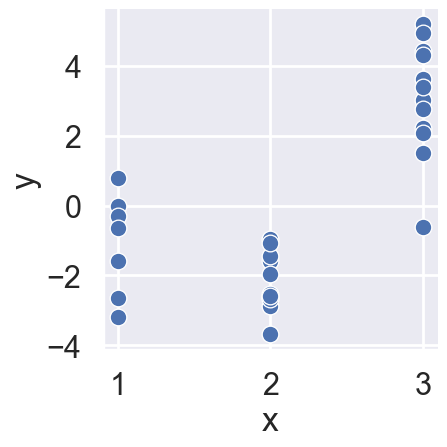

In [43]:
sns.relplot(x='x', y='y', kind='scatter', data=dat)

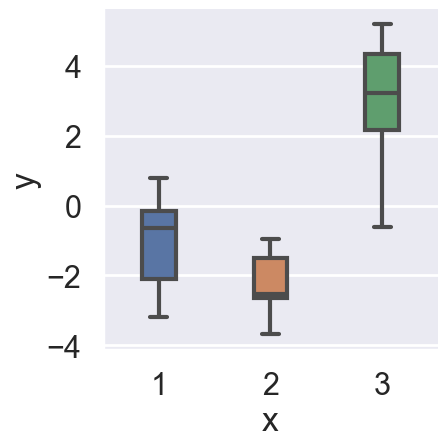

In [44]:
sns.catplot(x='x', y='y', data=dat, kind='box', width=0.3)

이제 변수 `x`를 연속형으로 취급하면서 회귀분석을 해보자.

In [45]:
from statsmodels.formula.api import ols

In [46]:
mod = ols("y ~ x", data = dat)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     24.83
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           2.91e-05
Time:                        18:57:33   Log-Likelihood:                -63.062
No. Observations:                  30   AIC:                             130.1
Df Residuals:                      28   BIC:                             132.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0145      1.107     -4.530      0.0

분석결과에 따르면 `x`가 1 증가할 때, y의 평균은 `2`가 증가하는 것으로 나온다.

만약 변수 `x`를 범주형으로 취급한다면(아래 `C(x)`는 **C**ategorical의 **C**인 듯 하다) 분석 결과는 다음과 같다.

In [47]:
mod = ols("y ~ C(x)", data = dat)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     47.30
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           1.50e-09
Time:                        18:57:34   Log-Likelihood:                -50.012
No. Observations:                  30   AIC:                             106.0
Df Residuals:                      27   BIC:                             110.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0806      0.511     -2.116      0.0

범주 `1`에서 범주 `2`로 바뀔 때 예상되는 `y` 평균의 감소는 1, 범주 `1`에서 범주 `3`으로 바뀔 때 예상되는 `y`의 평균 감소 5로 추정되었다. 위의 분석결과와 어떻게 다른지 생각해보자. 만약 `x`가 이미 범주형이라면면 `C(x)`로 쓰지 않아도 된다.

In [48]:
#dat = pd.DataFrame({'x2':pd.Categorical(x), 'y':y})
dat['x2'] = pd.Categorical(dat['x'])

In [49]:
mod = ols("y ~ x2", data = dat)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     47.30
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           1.50e-09
Time:                        18:57:35   Log-Likelihood:                -50.012
No. Observations:                  30   AIC:                             106.0
Df Residuals:                      27   BIC:                             110.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0806      0.511     -2.116      0.0

## 데이터 전처리에 있어 범주형

판다스 시리즈를 조작할 때 `dtype`이 범주형이라면 좀더 유의해야 한다. 다음의 예를 보자. 

In [50]:
x = pd.Series([1,2,3,2])
x[4] = 5 # dtype('int64')에서는 추가가 어렵지 않다
x

0    1
1    2
2    3
3    2
4    5
dtype: int64

데이터 타입이 정수라면 `x[4]=5`와 같이 사용해서 `x`에 4-번째 원소를 추가할 수 있다. 하지만 범주형이라면?

In [51]:
s = pd.Series(['a', 'b', 'b', 'a'], dtype='category')
s[4] = 'b' # 하지만 dtype이 object로 바뀜
s

0    a
1    b
2    b
3    a
4    b
dtype: category
Categories (2, object): ['a', 'b']

정수형 데이터 타입과 마찬가지로 성공적으로 원소를 추가한 듯 보이지만, `dtype`이 `object`으로 바뀌었다. 원한다면 `s.astype('category')`로 다시 범주형으로 돌려 놓을 수 있지만, 왜 그럴까?

In [52]:
s = s.astype('category')
s

0    a
1    b
2    b
3    a
4    b
dtype: category
Categories (2, object): ['a', 'b']

추가되는 원소의 타입을 확인해 볼 필요가 있다.

In [53]:
type('b')

str

추가되는 원소의 타입과 시리즈의 데이터 타입이 다르다. 위에서 dtype이 `int64`인 경우에도 비슷한 경우가 있다.

In [54]:
x[5] = 1.2
x

0    1.0
1    2.0
2    3.0
3    2.0
4    5.0
5    1.2
dtype: float64

기존의 원소는 정수형이고, 새롭게 추가되는 원소가 `float64`일 때, 결과는 dtype이 `float64`로 변경되었다.

그렇다면 이제 dtype을 보존하면서 새로운 원소를 추가하려면 어떻게 해야 할까? 복잡해보이지만 `pd.concat()`을 활용하면 다음과 같다.

In [55]:
pd.concat([s, pd.Series(['b'], dtype=unordered(['a', 'b']))])

0    a
1    b
2    b
3    a
4    b
0    b
dtype: category
Categories (2, object): ['a', 'b']

이때 추가하는 시리즈의 dtype에 유의해야 한다. 동일한 dtype끼리 합칠 때에는 dtype에 변화가 없다. 하지만 그렇지 않다면?

In [56]:
pd.concat([s, pd.Series(['b'], dtype=unordered(['b']))])

0    a
1    b
2    b
3    a
4    b
0    b
dtype: object

범주가 많건 적던 dtype이 다르다면 dtype은 `object`로 변경된다. 물론 `.astype('category')`로 다시 범주형으로 변환하거나 다음과 같이 `union_categorical()` 함수를 사용할 수 있다(순위형인 경우, 범주는 같은데 순위가 다르다면 에러가 발생한다. 만약 순위를 무시하고 싶다면 `ignore_order=True`로 설정한다.)

In [57]:
from pandas.api.types import union_categoricals
union_categoricals([s, pd.Series(['b'], dtype=unordered(['b']))])
s

0    a
1    b
2    b
3    a
4    b
dtype: category
Categories (2, object): ['a', 'b']

한 가지 아쉬운 점은 판다스 시리즈의 경우 인덱스가 보존되지 않는다는 점이다. 인덱스를 보존하고자 한다면 다음과 같이 사용할 수 있다.

In [58]:
s2 = pd.Series(['b'], dtype=unordered(['b']))
pd.Series(union_categoricals([s, s2]),
          index = s.index.tolist() + s2.index.tolist())

0    a
1    b
2    b
3    a
4    b
0    b
dtype: category
Categories (2, object): ['a', 'b']

## 범주형 다루기

위에서 확인했듯이 범주형 dtype은 다른 dtype과 조금 다른 부분이 있다. 일단 가능한 범주가 다른 범주형은 다른 dtype으로 취급된다. 여기서는 범주형 dtype을 관리하는 여러 방법을 안내한다. 주요 내용은 다음과 같다.

1. 범주 추가하기 : `.add_categories()`
2. 범주 삭제하기 : `.remove_categories()`, `.remove_unused_categories()`
3. 범주 이름 바꾸기 : `.rename_categories()`
4. 범주 순서 바꾸기 : `.reorder_categories()`, `.set_categories()`
5. 범주 합치기 : `from mypack.utils`, `cat_combine()`, `cat_collapse()`, `cat_collapse_cum()`


먼저 메쏘드 이름에서 그 기능을 충분히 유추할 수 있는 경우부터 살펴보자. 범주를 추가하거나(`.add_categories()`), 범주를 삭제하고(`.remove_categories()`), 사용되지 않는 범주를 삭제하는(`.remove_unused_categories()`)는 메쏘드를 사용해보자.

In [59]:
# x = pd.Categorical(['b', 'a', 'b', 'b'], dtype=CategoricalDtype(['a', 'b', 'c'], False))
x = pd.Categorical(['b', 'a', 'b', 'b'], dtype=unordered(['a', 'b', 'c']))
# y = pd.Series(['b', 'a', 'b', 'b'], dtype=CategoricalDtype(['a', 'b', 'c'], False))
y = pd.Series(['b', 'a', 'b', 'b'], dtype=unordered(['a', 'b', 'c']))
x, y

(['b', 'a', 'b', 'b']
 Categories (3, object): ['a', 'b', 'c'],
 0    b
 1    a
 2    b
 3    b
 dtype: category
 Categories (3, object): ['a', 'b', 'c'])

In [60]:
x2 = x.add_categories(['d', 'e'])
x2

['b', 'a', 'b', 'b']
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

In [61]:
#% eval=FALSE
y.add_categories(['d', 'e'])
## AttributeError: 'Series' object has no attribute 'add_categories'

AttributeError: 'Series' object has no attribute 'add_categories'

`pd.Categorical()`에도 사용 가능하고 `pd.Series()`에 대해서도 dtype이 범주형이라면 `.cat`을 통해 사용가능하다.

In [62]:
y2 = y.cat.add_categories(['d', 'e'])
y2

0    b
1    a
2    b
3    b
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

추가를 했으니 다시 삭제해보자.

In [63]:
x2.remove_categories(['d', 'e']), y2.cat.remove_categories(['d', 'e'])

(['b', 'a', 'b', 'b']
 Categories (3, object): ['a', 'b', 'c'],
 0    b
 1    a
 2    b
 3    b
 dtype: category
 Categories (3, object): ['a', 'b', 'c'])

사용되지 않는(데이터에 존재하지 않는) 범주를 삭제하려면 다음과 같다.

In [64]:
x.remove_unused_categories(), \
y.cat.remove_unused_categories()

(['b', 'a', 'b', 'b']
 Categories (2, object): ['a', 'b'],
 0    b
 1    a
 2    b
 3    b
 dtype: category
 Categories (2, object): ['a', 'b'])

범주 이름을 바꿀 때는 딕을 사용해서 바꾸기 전 이름과 바뀐 후 이름을 대응해 준다. 'a'를 'Alpha', 'b'를 'Big'으로 바꿔보자.

In [65]:
x.rename_categories({'a':'Alpha', 'b':'Beta'}), \
y.cat.rename_categories({'a':'Alpha', 'b':'Beta'})

(['Beta', 'Alpha', 'Beta', 'Beta']
 Categories (3, object): ['Alpha', 'Beta', 'c'],
 0     Beta
 1    Alpha
 2     Beta
 3     Beta
 dtype: category
 Categories (3, object): ['Alpha', 'Beta', 'c'])

모든 범주 이름을 바꾸려면 다음과 같이 새로운 범주 이름만 리스트로 제공해도 된다.

In [66]:
x.rename_categories(['Alpha', 'Beta', 'Charley']), \
y.cat.rename_categories({'a':'Alpha', 'b':'Beta'})

(['Beta', 'Alpha', 'Beta', 'Beta']
 Categories (3, object): ['Alpha', 'Beta', 'Charley'],
 0     Beta
 1    Alpha
 2     Beta
 3     Beta
 dtype: category
 Categories (3, object): ['Alpha', 'Beta', 'c'])

범주의 순서를 바꾸기 위해서는 `.reorder_categories()`와 `.set_categories()`를 사용할 수 있다. `.reorder_categories()`의 경우 기존의 범주를 재배치(`reorder`)하여 순서를 결정한다. 기존의 범주가 빠지거나, 새로운 범주가 추가될 수 없다. 반면 `.set_categories()`는 범주를 새롭게 지정하면서 순서까지 바꾼다. 기존의 범주가 빠지거나 새로운 범주가 추가될 수도 있다.

In [67]:
x.reorder_categories(['c', 'b', 'a']) # 원래 순서는 ['a', 'b', 'c']
y.cat.reorder_categories(['c', 'b', 'a'])

0    b
1    a
2    b
3    b
dtype: category
Categories (3, object): ['c', 'b', 'a']

In [68]:
x.set_categories(['c', 'b', 'a']),
y.cat.set_categories(['c', 'b', 'a'])

0    b
1    a
2    b
3    b
dtype: category
Categories (3, object): ['c', 'b', 'a']

이제 범주 `a`를 빼고, `d`를 추가해보자.

In [69]:
x.set_categories(['b', 'c', 'd']), \
y.cat.set_categories(['b', 'c', 'd'])

(['b', NaN, 'b', 'b']
 Categories (3, object): ['b', 'c', 'd'],
 0      b
 1    NaN
 2      b
 3      b
 dtype: category
 Categories (3, object): ['b', 'c', 'd'])

삭제된 범주였던 곳은 `np.nan`이 되었음을 확인하자.

### 범주 합치기

범주를 합치는 방법은 판다스에서 지원하지 않는 것으로 보인다. (!!! 혹시 제3자 패키지라도 발견하게 되면 알려주세요) 다음에서 저자가 만든 함수를 소개한다.

In [70]:
# from mypack.utils import cat_combine, cat_collapse, cat_collapse_cum
def cat_combine(x, lst_a, b):
    typ = type(x)
    if isinstance(x, pd.Categorical):
        if b not in x.categories:
            x2 = pd.Series(x.add_categories(b), index = x.add_categories(b),
                          dtype = "category")
        else:
            x2 = pd.Series(x, index = x,
                          dtype = "category")
    elif isinstance(x, pd.Series) and hasattr(x, "cat"):
        if b not in x.cat.categories:
            x2 = x.cat.add_categories(b)
            x2.index = x2
        else:
            x2 = x
            x2.index = x2
    else:
        raise ValueError("x should be either pd.Categorical or pd.Series([], dtype='category')")
        
    #print(x2)
    #print(type(x2))
    #print('*'*10)
    for cat in lst_a:
        x2.loc[cat] = b
    
    #print(x2.index)
    #print(x2)
    #print(type(x2))
        
    return typ(x2.cat.remove_categories(list(set(lst_a)-set([b]))))
        

def cat_collapse_cum(x, min_freq = None, min_pct = None, others = 'others'):
    if min_freq is not None and min_pct is not None:
        raise ValueError("Only one of min_freq or min_pct should be set")
    if min_freq is None and min_pct is None:
        min_pct = 0.01
    typ = type(x)
    if isinstance(x, pd.Categorical):
        if others in x.categories:
            raise ValueError(f"others({others}) already in the categories")
    elif isinstance(x, pd.Series) and hasattr(x, "cat"):
        if others in x.cat.categories:
            raise ValueError(f"others({others}) already in the categories")
    else:
        raise ValueError("x should be either pd.Categorical or pd.Series([], dtype='category')")
    
    cats = x.value_counts()
    cats_sum = cats.sum()
    cats_cumsum = cats.sort_values().cumsum()
    if min_freq is not None:
        cats_below = cats_cumsum < min_freq
    else:
        cats_below = cats_cumsum/cats_sum < min_pct
    cats_remain = set(cats.index) - set(cats[cats_below].index)
    if isinstance(x, pd.Categorical):
        x2 = x.set_categories(list(cats_remain)+[others])
    else:
        x2 = x.cat.set_categories(list(cats_remain)+[others])
    # x3 = x2.value_counts(dropna = False)
    x2[x2.isna()] = others
    if isinstance(x, pd.Categorical):
        x2 = x2.remove_unused_categories()
    else:
        x2 = x2.cat.remove_unused_categories()
    
    return typ(x2)

def cat_collapse(x, min_freq = None, min_pct = None, others = 'others'):
    if min_freq is not None and min_pct is not None:
        raise ValueError("Only one of min_freq or min_pct should be set")
    if min_freq is None and min_pct is None:
        min_pct = 0.01
    typ = type(x)
    if isinstance(x, pd.Categorical):
        if others in x.categories:
            raise ValueError(f"others({others}) already in the categories")
    elif isinstance(x, pd.Series) and hasattr(x, "cat"):
        if others in x.cat.categories:
            raise ValueError(f"others({others}) already in the categories")
    else:
        raise ValueError("x should be either pd.Categorical or pd.Series([], dtype='category')")
    
    cats = x.value_counts()
    if min_freq is not None:
        cats_below = cats < min_freq
    else:
        cats_below = cats/cats.sum() < min_pct
    cats_remain = set(cats.index) - set(cats[cats_below].index)
    if isinstance(x, pd.Categorical):
        x2 = x.set_categories(list(cats_remain)+[others])
    else:
        x2 = x.cat.set_categories(list(cats_remain)+[others])
    # x3 = x2.value_counts(dropna = False)
    x2[x2.isna()] = others
    if isinstance(x, pd.Categorical):
        x2 = x2.remove_unused_categories()
    else:
        x2 = x2.cat.remove_unused_categories()
    
    return typ(x2)



`cat_combine()` 함수는 범주형 데이터에서 2개 이상의 범주를 하나로 합친다. `pd.Categorical()`과 dtype이 `category`인 판다스 시리즈 모두 사용 가능하다.

In [71]:
import numpy as np
import pandas as pd

In [72]:
x0 = np.random.choice(list('abcdefg'), size=100, p=[0.6, 0.18, 0.07, 0.05, 0.05, 0.03, 0.02])

In [73]:
x = pd.Categorical(x0)
y = pd.Series(x0, dtype='category')

In [74]:
y.value_counts()

a    62
b    16
c     7
d     7
e     4
f     2
g     2
Name: count, dtype: int64

In [75]:
cat_combine(x, ['a', 'b'], 'c')

['c', 'c', 'c', 'c', 'c', ..., 'e', 'c', 'c', 'g', 'c']
Length: 100
Categories (5, object): ['c', 'd', 'e', 'f', 'g']

In [76]:
cat_combine(y, ['a', 'b'], 'c')

0     c
1     c
2     c
3     c
4     c
     ..
95    e
96    c
97    c
98    g
99    c
Length: 100, dtype: category
Categories (5, object): ['c', 'd', 'e', 'f', 'g']

`cat_collapse(x, min_freq)`와 `cat_collapse(x, min_pct)`은 모두 빈도 또는 비율이 작은 범주를 하나(예. `others`)로 묶어준다.

In [77]:
cat_collapse

<function __main__.cat_collapse(x, min_freq=None, min_pct=None, others='others')>

In [78]:
res1 = cat_collapse(x, min_pct=0.1, others='insignificant') 
# 0.1보다 작은 비율의 범주는 모두 'insignificant'로 묶는다.
res1

['a', 'b', 'b', 'b', 'a', ..., 'insignificant', 'a', 'insignificant', 'insignificant', 'a']
Length: 100
Categories (3, object): ['a', 'b', 'insignificant']

In [79]:
res2 = cat_collapse_cum(x, min_pct=0.1, others='<0.1') 
# 합쳐서 0.1보다 작은 비율의 범주는 모두 '<0.1'로 묶는다.
res2

['a', 'b', 'b', 'b', 'a', ..., '<0.1', 'a', 'c', '<0.1', 'a']
Length: 100
Categories (5, object): ['c', 'a', 'd', 'b', '<0.1']

둘의 차이는 다음의 결과에서 확인할 수 있다. 아쉽게도 위의 함수들은 순위형 자료형을 적절하게 처리하지 못한다. 순위형도 명목형으로 취급한다.

In [80]:
x.value_counts()

a    62
b    16
c     7
d     7
e     4
f     2
g     2
Name: count, dtype: int64

In [81]:
res1.value_counts()/len(res1)

a                0.62
b                0.16
insignificant    0.22
Name: count, dtype: float64

In [82]:
res2.value_counts()/len(res1)

c       0.07
a       0.62
d       0.07
b       0.16
<0.1    0.08
Name: count, dtype: float64